In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [7]:
X = df.iloc[:,:-1]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [8]:
y = df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
knn = KNeighborsClassifier()

In [12]:
params = [{'n_neighbors': np.arange(1, 20), 'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minowski']}]

In [13]:
gsv = GridSearchCV(knn, param_grid= params, cv= 10)

In [14]:
gsv.fit(X_train, y_train)

D:\yb python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
D:\yb python\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
190 fits failed out of a total of 760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "D:\yb python\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\yb python\lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "D:\yb python\lib\

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan', 'chebyshev',
                                     'minowski'],
                          'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])}])

In [15]:
gsv.best_params_, gsv.best_score_

({'metric': 'manhattan', 'n_neighbors': 1}, 0.6857142857142857)

In [16]:
%matplotlib inline

D:\yb python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
D:\yb python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
D:\yb python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
D:\yb python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
D:\yb python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
D:\yb python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The lea

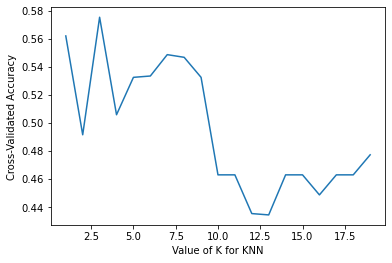

In [17]:
k_range = range(1, 20)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_test, y_test, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [18]:
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 1)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [20]:
pred = knn.predict(X_test)

In [21]:
print(pred==y_test)

9       True
197     True
66      True
191     True
117     True
       ...  
65      True
108    False
181    False
31      True
12      True
Name: Type, Length: 71, dtype: bool


In [22]:
confusion_matrix(pred, y_test)

array([[18,  3,  1,  0,  0,  0],
       [ 2, 17,  0,  1,  1,  0],
       [ 2,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  5,  1,  0],
       [ 0,  4,  0,  0,  2,  1],
       [ 0,  1,  0,  0,  0,  9]], dtype=int64)

In [23]:
print(accuracy_score(y_test, pred))

0.7605633802816901


In [24]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           1       0.82      0.82      0.82        22
           2       0.68      0.81      0.74        21
           3       0.75      0.60      0.67         5
           5       0.83      0.83      0.83         6
           6       0.50      0.29      0.36         7
           7       0.90      0.90      0.90        10

    accuracy                           0.76        71
   macro avg       0.75      0.71      0.72        71
weighted avg       0.75      0.76      0.75        71

